In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
import os

In [6]:
x = np.random.normal(5, size=10000)
y = np.random.normal(5, size=10000)

z1 = [1e6, 1e8, 1e10, 1e9, 1e8]
z2 = [1e10, 1e11, 1e6, 1e8, 1e9]

In [2]:
para_data = pd.read_csv('/Users/sidneylower/Documents/snap305_1000_para/parametric_data.csv')
cont_data = pd.read_csv('/Users/sidneylower/Documents/snap305_1000_cont/cont_data.csv')
dir_data = pd.read_csv('/Users/sidneylower/Documents/snap305_1000_dirichlet/dirichlet_data.csv')

Text(0.5,1,'Dirichlet SFH')

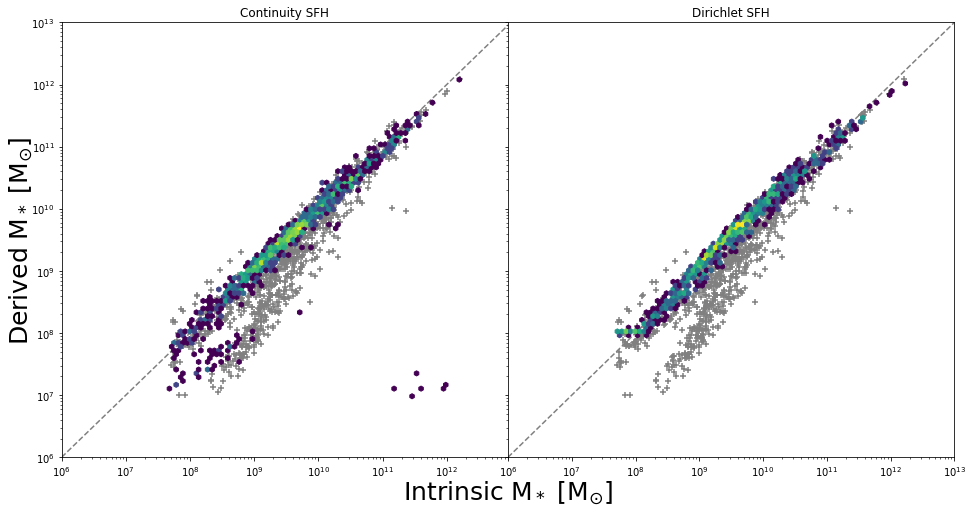

In [4]:
fig = plt.figure(figsize=(16, 8))
ax = fig.subplots(1, 2)
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Intrinsic M$_*$ [M$_{\odot}$]", fontsize=25)
plt.ylabel("Derived M$_*$ [M$_{\odot}$]", fontsize=25)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tick_params(axis='both', which='major', labelsize=13)
#plt.tick_params(axis='both', which='minor', labelsize=10)
for i in range(2):
    ax[i].plot([1e6, 1e13], [1e6, 1e13], color='gray', ls='--', zorder=0)
#ax[0].hexbin(para_data['int_smass'], para_data['der_smass'], xscale='log', yscale='log', bins='log', extent=[6, 13, 6, 13], mincnt=1)
ax[0].hexbin(cont_data['int_smass'], cont_data['der_smass'], xscale='log', yscale='log', bins='log', extent=[6, 13, 6, 13], mincnt=1, label='Continuity SFH')
ax[0].scatter(para_data['int_smass'], para_data['der_smass'], s=30, marker='+', color='gray', zorder=0)

ax[1].hexbin(dir_data['int_smass'], dir_data['der_smass'], xscale='log', yscale='log', bins='log', extent=[6, 13, 6, 13], mincnt=1,label='Dirichlet SFH')
ax[1].scatter(para_data['int_smass'], para_data['der_smass'], s=30, marker='+', color='gray', zorder=0)
#plt.scatter(dat['int_smass'], dat['der_smass'], color='gray', s=10, marker='+', zorder=0)


ax[0].set_ylim([1e6, 1e13])
ax[0].set_xlim([1e6, 9e12])
ax[1].set_ylim([1e6, 1e13])
ax[1].set_xlim([1e6, 1e13])

ax[1].set_yticklabels([])

ax[0].set_title('Continuity SFH')
ax[1].set_title('Dirichlet SFH')

#ax[2].set_ylim([1e6, 1e13])
#ax[2].set_xlim([1e6, 1e13])
#plt.savefig('/Users/sidneylower/Desktop/Mstar_comp.png', dpi=300)


In [193]:
# SFR-M*






NameError: name 'dat2' is not defined

In [25]:
arr = np.array([dat['int_smass'], dat['der_smass']])

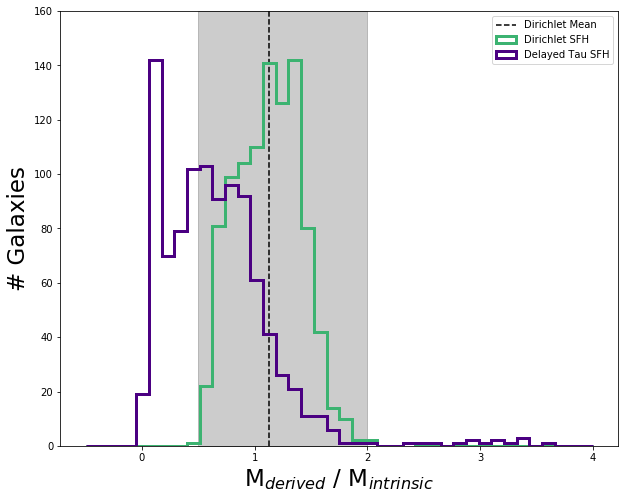

In [282]:
dist_cont = []
dist_dirilect = []
dist_para = []
dist_paraburst = []

for i in range(len(cont_data['int_smass'])):
    dist_cont.append(np.log10(cont_data['int_smass'][i]) - np.log10(cont_data['der_smass'][i]))

for i in range(len(dir_data['int_smass'])):
    dist_dirilect.append(dir_data['der_smass'][i] / dir_data['int_smass'][i])

for i in range(len(para_data['int_smass'])):
    dist_para.append(para_data['der_smass'][i] / para_data['int_smass'][i])

#for i in range(len(paraburst_data['int_smass'])):
#    dist_paraburst.append(np.log10(paraburst_data['int_smass'][i]) - np.log10(paraburst_data['der_smass'][i]))
mean = np.mean(dist_dirilect)
plt.figure(figsize=(10, 8))
#n, bins, _ = plt.hist(dist_cont, bins=100, range=(-1, 5),histtype='step',edgecolor='darkorange', fill=False, label='Continuity SFH')
n, bins, _ = plt.hist(dist_dirilect, bins=40, range=(-0.5, 4), lw=3, histtype='step', edgecolor='mediumseagreen', fill=False, label='Dirichlet SFH')
n, bins, _ = plt.hist(dist_para, bins=40,range=(-0.5, 4), lw=3, histtype='step',edgecolor='indigo', fill=False, label='Delayed Tau SFH')
#n, bins, _ = plt.hist(dist_paraburst, bins=50, edgecolor='purple', color='None', label='Delayed Tau + Burst SFH')
#plt.plot([0.5, 0.5], [0, 160], color='k', zorder=0)
#plt.plot([2.0, 2.0], [0,160],  color='k', zorder=0)
plt.fill_between([0.5, 2.0], [0],[160],color='black',alpha=.2, zorder=0)
plt.plot([mean, mean], [0, 160], ls='--', color='black', zorder=0, label='Dirichlet Mean')
plt.xlabel('M$_{derived}$ / M$_{intrinsic}$', fontsize=23)
plt.ylabel('# Galaxies', fontsize=23)
plt.ylim([0, 160])
plt.legend()
plt.savefig('/Users/sidneylower/Desktop/stellarmass_ratio.png', dpi=300)
#plt.close()

In [70]:

import prospect.io.read_results as pread

In [132]:
res, obs, mod = pread.results_from('/Users/sidneylower/Documents/snap305_1000_burst/snap305.galaxy061_1559381474_mcmc.h5')

In [133]:
res['model_params']

[{'N': 1,
  'isfree': False,
  'init': 0.1,
  'units': 'redshift',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0),
  'name': 'zred'},
 {'N': 1,
  'isfree': True,
  'init': 10000000000.0,
  'units': 'Solar masses formed',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=10000000.0,maxi=100000000000000.0),
  'name': 'mass'},
 {'N': 1,
  'isfree': True,
  'init': 0.0,
  'units': '$\\log (Z/Z_\\odot)$',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=-2.0,maxi=0.5),
  'name': 'logzsol'},
 {'N': 1,
  'isfree': True,
  'init': 0.6,
  'units': 'optical depth at 5500AA',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0),
  'name': 'dust2'},
 {'N': 1, 'isfree': False, 'init': 4, 'units': 'FSPS index', 'name': 'sfh'},
 {'N': 1,
  'isfree': True,
  'init': 1,
  'units': 'Gyr',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8),
  'name': 'tage'},
 {'N': 1, 'isfree': False, 'init': 2, 'name': 'imf_type'},
 {'N': 1,
  '

In [54]:
test = [] 
arr = [1, 3, 6, 9]
names = ['a', 'b', 'c', 'd']

In [55]:
for i in range(0, 4):
    test.append(arr)

In [134]:
res['theta_labels']

['mass',
 'logzsol',
 'dust2',
 'tage',
 'tau',
 'duste_umin',
 'duste_qpah',
 'duste_gamma',
 'fburst',
 'fage_burst',
 'dust1',
 'dust_index']

In [46]:
stack = [names, test]

In [47]:
stack

[['a', 'b', 'c', 'd'],
 [[1, 3, 6, 9], [1, 3, 6, 9], [1, 3, 6, 9], [1, 3, 6, 9]]]

ValueError: setting an array element with a sequence

In [32]:
np.savetxt('/Users/sidneylower/Desktop/test.csv', stack)

ValueError: setting an array element with a sequence

In [69]:
print('adskljf_%03d' % 100+'_'+str(12))

adskljf_100_12


In [10]:
test = ['logsfr_ratio_1', 'logsfr_ratio_2', 'logsfr_ratio_3', 'mass', 'tau', 'age']

In [11]:
sfr = [i for i, s in enumerate(test) if 'mass' not in s]

In [12]:
sfr

[0, 1, 2, 4, 5]

In [98]:
arr = []
for i in sfr:
    arr.append(test[i])

In [99]:
arr

['logsfr_ratio_1', 'logsfr_ratio_2', 'logsfr_ratio_3']

In [119]:
args = ['--param_file=bleh', '--outfile=adfasf', '--test=asdfasd']

In [124]:
for arg in args:
    if arg.startswith('--param_file'):
        test = arg[13:]
        print(test)
    else: print('no')

bleh
no
no


In [125]:
len(args[0])

17

In [183]:
test = [1, 2, 3, 4, 5]
value = 3.5
y = [10, 15, 17, 18, 20]

In [184]:
test.append(value)

In [185]:
test.sort()

In [186]:
idx = test.index(value)
y = np.insert(y, idx, 8)

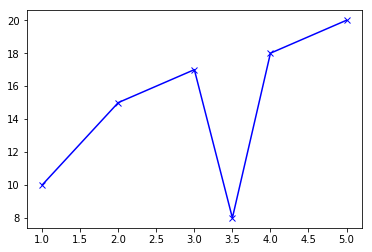

In [187]:
plt.plot(test, y2, 'xb-')

In [165]:
idx = test.index(value)

In [170]:
y2 = np.insert(y, idx, 8)

In [173]:
y2

array([10, 15, 17,  8, 18, 20])

In [174]:
test

[1, 2, 3, 4, 5, 3.5]

In [188]:
test = ['fburst', 'tburst', 'mass', 'sfr', 'tage']

In [190]:
if 'age' in test:
    print('yes')



In [235]:
from scipy.stats import beta

In [241]:
x = np.arange(0, 1, 0.05)
y = beta.pdf(x, 1.0, 1.0)

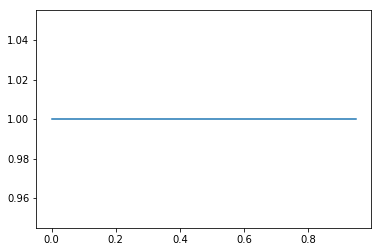

In [242]:
plt.plot(x, y)

In [13]:
path = '/Users/sidneylower/Desktop/untitled folder/'
file = 'test1.sid.txt'
test = pd.read_csv(path+file)

In [19]:
file.split(os.extsep, 2)[1]

'sid'

In [9]:
import yt